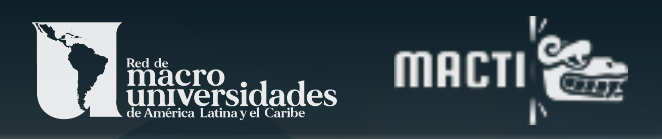

# Introducción a Pandas 
Esta es una breve introducción a los pandas, dirigida principalmente a nuevos usuarios. Puede ver recetas más complejas en el libro de cocina .

Por lo general, importamos de la siguiente manera:

In [1]:
import numpy as np

In [2]:
import pandas as pd

## Creación de objetos 
Consulte la sección Introducción a la estructura de datos .

Creando un Series pasando una lista de valores, permitiendo que los pandas creen un índice entero predeterminado:

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creando un `DataFrame` pasando una matriz NumPy, con un índice de fecha y hora y columnas etiquetadas:

In [4]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,0.424740,-0.304257,-1.216376,-1.440031
2013-01-02,-0.608821,-0.741290,0.963943,0.811659
2013-01-03,0.545859,1.365325,-0.097721,0.570380
2013-01-04,-0.325193,-0.037359,0.126041,-0.160936
2013-01-05,-1.469123,1.053327,0.110912,0.346316
2013-01-06,-2.970139,-0.547345,-0.390152,0.470675


Creando un `DataFrame` dictado de objetos que se pueden convertir a series.

In [6]:
df2 = pd.DataFrame(
    {
   "A": 1.0,
   "B": pd.Timestamp("20130102"),
   "C": pd.Series(1, index=list(range(5)), dtype="float32"),
   "D": np.array([3] * 5, dtype="int32"),
   "E": pd.Categorical(["test", "train", "test", "train", "other"]),
   "F": "foo",
     }
   )
# "Categoricals" son un tipo de datos pandas correspondientes a variables categóricas 
# en Estadísticas. Una variable categórica asume un valor limitado, y generalmente fijo, 
# número de valores posibles.

In [7]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo
4,1.0,2013-01-02,1.0,3,other,foo


Las columnas del resultado `DataFrame` tienen diferentes `tipos`.

In [8]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

___________________________
Si está utilizando `IPython`, la finalización de tabulación para los nombres de columna (así como los atributos públicos) se habilita automáticamente. Aquí hay un subconjunto de los atributos que se completarán:

In [9]:
df2.A 

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: A, dtype: float64

In [10]:
df2.B

0   2013-01-02
1   2013-01-02
2   2013-01-02
3   2013-01-02
4   2013-01-02
Name: B, dtype: datetime64[ns]

In [11]:
df2.C

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: C, dtype: float32

In [12]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [13]:
df2.all()

<ipython-input-13-9af79e7da07e>:1: FutureWarning: The default value of bool_only in DataFrame.all is deprecated. In a future version, it will default to False. In addition, specifying 'bool_only=None' is deprecated. Select only valid columns or specify the value of bool_only to silence this warning.
  df2.all()


A    True
B    True
C    True
D    True
F    True
dtype: bool

In [14]:
df2.describe()

,A,C,D
count,5.0,5.0,5.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


Duplicate https://www.geeksforgeeks.org/python-pandas-dataframe-duplicated/

Nos muestra si las filas son duplicadas, mediante False o True

In [15]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo
4,1.0,2013-01-02,1.0,3,other,foo


In [16]:
df2.duplicated()

0    False
1    False
2     True
3     True
4    False
dtype: bool

In [17]:
df.head()

,A,B,C,D
2013-01-01,0.424740,-0.304257,-1.216376,-1.440031
2013-01-02,-0.608821,-0.741290,0.963943,0.811659
2013-01-03,0.545859,1.365325,-0.097721,0.570380
2013-01-04,-0.325193,-0.037359,0.126041,-0.160936
2013-01-05,-1.469123,1.053327,0.110912,0.346316


In [18]:
df.head(2)

,A,B,C,D
2013-01-01,0.424740,-0.304257,-1.216376,-1.440031
2013-01-02,-0.608821,-0.741290,0.963943,0.811659


In [19]:
df.tail()

,A,B,C,D
2013-01-02,-0.608821,-0.741290,0.963943,0.811659
2013-01-03,0.545859,1.365325,-0.097721,0.570380
2013-01-04,-0.325193,-0.037359,0.126041,-0.160936
2013-01-05,-1.469123,1.053327,0.110912,0.346316
2013-01-06,-2.970139,-0.547345,-0.390152,0.470675


In [20]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.325193,-0.037359,0.126041,-0.160936
2013-01-05,-1.469123,1.053327,0.110912,0.346316
2013-01-06,-2.970139,-0.547345,-0.390152,0.470675


Mostrar el índice, columnas:

In [21]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [22]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

## DataFrame.to_numpy() da una representación NumPy de los datos subyacentes. 
Tenga en cuenta que esta puede ser una operación costosa cuando `DataFrame` tiene columnas con diferentes tipos de datos, lo que se reduce a una diferencia fundamental entre pandas y NumPy: las matrices NumPy tienen un dtype para toda la matriz, mientras que los pandas DataFrames tienen un dtype por columna. 

Cuando llame `DataFrame.to_numpy()`, los pandas encontrarán el `dtype NumPy` que puede contener todos los dtypes en el DataFrame. Esto puede terminar siendo object, lo que requiere convertir todos los valores en un objeto Python.

Porque df, DataFrame de todos los valores de punto flotante, DataFrame.to_numpy() es rápido y no requiere copiar datos.

In [23]:
df

,A,B,C,D
2013-01-01,0.424740,-0.304257,-1.216376,-1.440031
2013-01-02,-0.608821,-0.741290,0.963943,0.811659
2013-01-03,0.545859,1.365325,-0.097721,0.570380
2013-01-04,-0.325193,-0.037359,0.126041,-0.160936
2013-01-05,-1.469123,1.053327,0.110912,0.346316
2013-01-06,-2.970139,-0.547345,-0.390152,0.470675


In [24]:
df_np = df.to_numpy()
df_np

array([[ 0.42474038, -0.30425678, -1.21637608, -1.44003136],
       [-0.60882146, -0.74128993,  0.96394273,  0.81165909],
       [ 0.54585921,  1.36532521, -0.09772126,  0.57037994],
       [-0.32519314, -0.03735899,  0.12604145, -0.16093567],
       [-1.46912281,  1.05332732,  0.11091216,  0.34631586],
       [-2.97013925, -0.54734531, -0.39015212,  0.4706755 ]])

In [25]:
 df2_np = df2.to_numpy()
 df2_np 

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'other', 'foo']],
      dtype=object)

DataFrame.to_numpy() no incluye las etiquetas de índice o de columna en la salida.

Transposición de sus datos:

In [26]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.424740,-0.608821,0.545859,-0.325193,-1.469123,-2.970139
B,-0.304257,-0.741290,1.365325,-0.037359,1.053327,-0.547345
C,-1.216376,0.963943,-0.097721,0.126041,0.110912,-0.390152
D,-1.440031,0.811659,0.570380,-0.160936,0.346316,0.470675


Ordenar por un eje:

In [27]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.440031,-1.216376,-0.304257,0.424740
2013-01-02,0.811659,0.963943,-0.741290,-0.608821
2013-01-03,0.570380,-0.097721,1.365325,0.545859
2013-01-04,-0.160936,0.126041,-0.037359,-0.325193
2013-01-05,0.346316,0.110912,1.053327,-1.469123
2013-01-06,0.470675,-0.390152,-0.547345,-2.970139


In [28]:
df.sort_index(axis=1)#, ascending=True)

,A,B,C,D
2013-01-01,0.424740,-0.304257,-1.216376,-1.440031
2013-01-02,-0.608821,-0.741290,0.963943,0.811659
2013-01-03,0.545859,1.365325,-0.097721,0.570380
2013-01-04,-0.325193,-0.037359,0.126041,-0.160936
2013-01-05,-1.469123,1.053327,0.110912,0.346316
2013-01-06,-2.970139,-0.547345,-0.390152,0.470675


In [29]:
df.sort_values(by="B")

,A,B,C,D
2013-01-02,-0.608821,-0.741290,0.963943,0.811659
2013-01-06,-2.970139,-0.547345,-0.390152,0.470675
2013-01-01,0.424740,-0.304257,-1.216376,-1.440031
2013-01-04,-0.325193,-0.037359,0.126041,-0.160936
2013-01-05,-1.469123,1.053327,0.110912,0.346316
2013-01-03,0.545859,1.365325,-0.097721,0.570380


In [30]:
df.sort_values(by="C", ascending=False)

,A,B,C,D
2013-01-02,-0.608821,-0.741290,0.963943,0.811659
2013-01-04,-0.325193,-0.037359,0.126041,-0.160936
2013-01-05,-1.469123,1.053327,0.110912,0.346316
2013-01-03,0.545859,1.365325,-0.097721,0.570380
2013-01-06,-2.970139,-0.547345,-0.390152,0.470675
2013-01-01,0.424740,-0.304257,-1.216376,-1.440031


In [31]:
df.sort_values(by="B", ascending=False)

,A,B,C,D
2013-01-03,0.545859,1.365325,-0.097721,0.570380
2013-01-05,-1.469123,1.053327,0.110912,0.346316
2013-01-04,-0.325193,-0.037359,0.126041,-0.160936
2013-01-01,0.424740,-0.304257,-1.216376,-1.440031
2013-01-06,-2.970139,-0.547345,-0.390152,0.470675
2013-01-02,-0.608821,-0.741290,0.963943,0.811659


In [32]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2013-01-06,-2.970139,-0.547345,-0.390152,0.470675
2013-01-05,-1.469123,1.053327,0.110912,0.346316
2013-01-04,-0.325193,-0.037359,0.126041,-0.160936
2013-01-03,0.545859,1.365325,-0.097721,0.570380
2013-01-02,-0.608821,-0.741290,0.963943,0.811659
2013-01-01,0.424740,-0.304257,-1.216376,-1.440031


In [33]:
df.sort_index(axis=0, ascending=True)

,A,B,C,D
2013-01-01,0.424740,-0.304257,-1.216376,-1.440031
2013-01-02,-0.608821,-0.741290,0.963943,0.811659
2013-01-03,0.545859,1.365325,-0.097721,0.570380
2013-01-04,-0.325193,-0.037359,0.126041,-0.160936
2013-01-05,-1.469123,1.053327,0.110912,0.346316
2013-01-06,-2.970139,-0.547345,-0.390152,0.470675


In [34]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.440031,-1.216376,-0.304257,0.424740
2013-01-02,0.811659,0.963943,-0.741290,-0.608821
2013-01-03,0.570380,-0.097721,1.365325,0.545859
2013-01-04,-0.160936,0.126041,-0.037359,-0.325193
2013-01-05,0.346316,0.110912,1.053327,-1.469123
2013-01-06,0.470675,-0.390152,-0.547345,-2.970139


## Selección 
* Nota

Mientras que las expresiones estándar `Python / numpy` para seleccionar y establecer son intuitivos y son útiles para el trabajo interactivo, para el código de producción, se recomienda los métodos de acceso de datos optimizados pandas, `.at, .iat, .locy .iloc.`

Consulte la documentación de indexación Indexación y selección de datos y MultiIndex / Indexación avanzada.
https://pandas.pydata.org/docs/user_guide/advanced.html#advanced

### Obteniendo
Seleccionando una sola columna, que produce un Series, equivalente a `df.A`:

In [35]:
df["A"]

2013-01-01    0.424740
2013-01-02   -0.608821
2013-01-03    0.545859
2013-01-04   -0.325193
2013-01-05   -1.469123
2013-01-06   -2.970139
Freq: D, Name: A, dtype: float64

Seleccionando vía  `[]`, que corta las filas.

In [36]:
df[0:3] # Selecciono desde la Fila 0 hasta la 2 inclusive

,A,B,C,D
2013-01-01,0.424740,-0.304257,-1.216376,-1.440031
2013-01-02,-0.608821,-0.741290,0.963943,0.811659
2013-01-03,0.545859,1.365325,-0.097721,0.570380


In [37]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.608821,-0.741290,0.963943,0.811659
2013-01-03,0.545859,1.365325,-0.097721,0.570380
2013-01-04,-0.325193,-0.037359,0.126041,-0.160936


### Selección por etiqueta 
Ver más en Selección por etiqueta.

Para obtener una sección transversal usando una etiqueta:

In [38]:
df.loc[dates[0]]

A    0.424740
B   -0.304257
C   -1.216376
D   -1.440031
Name: 2013-01-01 00:00:00, dtype: float64

In [39]:
df.loc[dates[2]]

A    0.545859
B    1.365325
C   -0.097721
D    0.570380
Name: 2013-01-03 00:00:00, dtype: float64

Seleccionando en un multi-eje por etiqueta:

In [40]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,0.424740,-0.304257
2013-01-02,-0.608821,-0.741290
2013-01-03,0.545859,1.365325
2013-01-04,-0.325193,-0.037359
2013-01-05,-1.469123,1.053327
2013-01-06,-2.970139,-0.547345


Al mostrar la división de etiquetas, se incluyen ambos puntos finales :

In [41]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.608821,-0.741290
2013-01-03,0.545859,1.365325
2013-01-04,-0.325193,-0.037359


Reducción de las dimensiones del objeto devuelto:

In [42]:
df.loc["20130102", ["A", "B"]]

A   -0.608821
B   -0.741290
Name: 2013-01-02 00:00:00, dtype: float64

Para obtener un valor escalar:

In [43]:
df.loc[dates[0], "A"]

0.42474037576605467

Para obtener acceso rápido a un escalar (equivalente al método anterior):

In [44]:
df.at[dates[0], "A"]

0.42474037576605467

### Selección por posición 
Ver más en Selección por posición.

Seleccione a través de la posición de los enteros pasados:

In [45]:
df

,A,B,C,D
2013-01-01,0.424740,-0.304257,-1.216376,-1.440031
2013-01-02,-0.608821,-0.741290,0.963943,0.811659
2013-01-03,0.545859,1.365325,-0.097721,0.570380
2013-01-04,-0.325193,-0.037359,0.126041,-0.160936
2013-01-05,-1.469123,1.053327,0.110912,0.346316
2013-01-06,-2.970139,-0.547345,-0.390152,0.470675


In [46]:
df.iloc[3]

A   -0.325193
B   -0.037359
C    0.126041
D   -0.160936
Name: 2013-01-04 00:00:00, dtype: float64

Por segmentos enteros, actuando de manera similar a `numpy / Python`:

In [47]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.325193,-0.037359
2013-01-05,-1.469123,1.053327


Por listas de ubicaciones de posiciones enteras, similar al estilo `NumPy / Python`:

In [48]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.608821,0.963943
2013-01-03,0.545859,-0.097721
2013-01-05,-1.469123,0.110912


Para cortar filas explícitamente:

In [49]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.608821,-0.741290,0.963943,0.811659
2013-01-03,0.545859,1.365325,-0.097721,0.570380


Para cortar columnas explícitamente:

In [50]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.304257,-1.216376
2013-01-02,-0.741290,0.963943
2013-01-03,1.365325,-0.097721
2013-01-04,-0.037359,0.126041
2013-01-05,1.053327,0.110912
2013-01-06,-0.547345,-0.390152


Para obtener un valor explícitamente:

In [51]:
df.iloc[1, 1]

-0.7412899329591636

Para obtener acceso rápido a un escalar (equivalente al método anterior):

In [52]:
df.iat[1, 1]

-0.7412899329591636

### Indexación booleana 
Usar los valores de una sola columna para seleccionar datos.

In [53]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,0.424740,-0.304257,-1.216376,-1.440031
2013-01-03,0.545859,1.365325,-0.097721,0.570380


In [54]:
df[df["A"] < 0]

,A,B,C,D
2013-01-02,-0.608821,-0.741290,0.963943,0.811659
2013-01-04,-0.325193,-0.037359,0.126041,-0.160936
2013-01-05,-1.469123,1.053327,0.110912,0.346316
2013-01-06,-2.970139,-0.547345,-0.390152,0.470675


Seleccionar valores de un DataFrame donde se cumple una condición booleana.

In [55]:
df[df > 0]

,A,B,C,D
2013-01-01,0.424740,NaN,NaN,NaN
2013-01-02,NaN,NaN,0.963943,0.811659
2013-01-03,0.545859,1.365325,NaN,0.570380
2013-01-04,NaN,NaN,0.126041,NaN
2013-01-05,NaN,1.053327,0.110912,0.346316
2013-01-06,NaN,NaN,NaN,0.470675


In [56]:
df[df < 0]

,A,B,C,D
2013-01-01,NaN,-0.304257,-1.216376,-1.440031
2013-01-02,-0.608821,-0.741290,NaN,NaN
2013-01-03,NaN,NaN,-0.097721,NaN
2013-01-04,-0.325193,-0.037359,NaN,-0.160936
2013-01-05,-1.469123,NaN,NaN,NaN
2013-01-06,-2.970139,-0.547345,-0.390152,NaN


In [57]:
df[df[df < 0.5] > -0.5]

,A,B,C,D
2013-01-01,0.424740,-0.304257,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,-0.097721,NaN
2013-01-04,-0.325193,-0.037359,0.126041,-0.160936
2013-01-05,NaN,NaN,0.110912,0.346316
2013-01-06,NaN,NaN,-0.390152,0.470675


Usando el método `isin()` de filtrado:

In [58]:
df3 = df.copy()
df3["E"] = ["Zero", "One", "Two", "Three", "Four", "Three"]
df3

,A,B,C,D,E
2013-01-01,0.424740,-0.304257,-1.216376,-1.440031,Zero
2013-01-02,-0.608821,-0.741290,0.963943,0.811659,One
2013-01-03,0.545859,1.365325,-0.097721,0.570380,Two
2013-01-04,-0.325193,-0.037359,0.126041,-0.160936,Three
2013-01-05,-1.469123,1.053327,0.110912,0.346316,Four
2013-01-06,-2.970139,-0.547345,-0.390152,0.470675,Three


In [59]:
df3[df3["E"].isin(["Two", "Four"])]

,A,B,C,D,E
2013-01-03,0.545859,1.365325,-0.097721,0.570380,Two
2013-01-05,-1.469123,1.053327,0.110912,0.346316,Four


### Configuración 
El establecimiento de una nueva columna alinea automáticamente los datos según los índices.

In [60]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [61]:
df["F"] = s1

Configuración de valores por etiqueta:

In [62]:
df.at[dates[0], "A"] = 0

Configuración de valores por posición:

In [63]:
df.iat[0, 1] = 0

Configuración asignando con una matriz NumPy:

In [64]:
df.loc[:, "D"] = np.array([5] * len(df))

<ipython-input-64-c9cfd4f62edf>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "D"] = np.array([5] * len(df))


El resultado de las operaciones de ajuste anteriores.

In [65]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.216376,5,NaN
2013-01-02,-0.608821,-0.741290,0.963943,5,1.0
2013-01-03,0.545859,1.365325,-0.097721,5,2.0
2013-01-04,-0.325193,-0.037359,0.126041,5,3.0
2013-01-05,-1.469123,1.053327,0.110912,5,4.0
2013-01-06,-2.970139,-0.547345,-0.390152,5,5.0


Una operación `where` con ambientación.

In [66]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.216376,-5,NaN
2013-01-02,-0.608821,-0.741290,-0.963943,-5,-1.0
2013-01-03,-0.545859,-1.365325,-0.097721,-5,-2.0
2013-01-04,-0.325193,-0.037359,-0.126041,-5,-3.0
2013-01-05,-1.469123,-1.053327,-0.110912,-5,-4.0
2013-01-06,-2.970139,-0.547345,-0.390152,-5,-5.0


### Datos faltantes
pandas utiliza principalmente el valor np.nan para representar los datos faltantes. Por defecto, no se incluye en los cálculos.

La reindexación le permite cambiar / agregar / eliminar el índice en un eje específico. Esto devuelve una copia de los datos.

In [67]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.216376,5,NaN,1.0
2013-01-02,-0.608821,-0.741290,0.963943,5,1.0,1.0
2013-01-03,0.545859,1.365325,-0.097721,5,2.0,NaN
2013-01-04,-0.325193,-0.037359,0.126041,5,3.0,NaN


Para eliminar las filas que tienen datos faltantes.

In [68]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.608821,-0.74129,0.963943,5,1.0,1.0


Llenando los datos faltantes.

In [69]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.216376,5,5.0,1.0
2013-01-02,-0.608821,-0.741290,0.963943,5,1.0,1.0
2013-01-03,0.545859,1.365325,-0.097721,5,2.0,5.0
2013-01-04,-0.325193,-0.037359,0.126041,5,3.0,5.0


Para obtener la máscara booleana donde están los valores `nan`.

In [70]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operaciones
Consulte la sección básica sobre operaciones binarias .

### Estadísticas 
Las operaciones en general excluyen los datos faltantes.

Realización de una estadística descriptiva:

In [71]:
df.mean()

A   -0.804570
B    0.182110
C   -0.083892
D    5.000000
F    3.000000
dtype: float64

In [72]:
df.mean(0)

A   -0.804570
B    0.182110
C   -0.083892
D    5.000000
F    3.000000
dtype: float64

Misma operación en el otro eje:

In [73]:
df.mean(1)

2013-01-01    0.945906
2013-01-02    1.122766
2013-01-03    1.762693
2013-01-04    1.552698
2013-01-05    1.739023
2013-01-06    1.218473
Freq: D, dtype: float64

Operar con objetos que tienen diferente dimensionalidad y necesitan alineación. Además, los pandas transmiten automáticamente a lo largo de la dimensión especificada.

In [74]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [75]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.454141,0.365325,-1.097721,4.0,1.0
2013-01-04,-3.325193,-3.037359,-2.873959,2.0,0.0
2013-01-05,-6.469123,-3.946673,-4.889088,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Aplicar 
Aplicar funciones a los datos:

In [76]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.216376,5,NaN
2013-01-02,-0.608821,-0.741290,0.963943,5,1.0
2013-01-03,0.545859,1.365325,-0.097721,5,2.0
2013-01-04,-0.325193,-0.037359,0.126041,5,3.0
2013-01-05,-1.469123,1.053327,0.110912,5,4.0
2013-01-06,-2.970139,-0.547345,-0.390152,5,5.0


In [77]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.216376,5,NaN
2013-01-02,-0.608821,-0.741290,-0.252433,10,1.0
2013-01-03,-0.062962,0.624035,-0.350155,15,3.0
2013-01-04,-0.388155,0.586676,-0.224113,20,6.0
2013-01-05,-1.857278,1.640004,-0.113201,25,10.0
2013-01-06,-4.827417,1.092658,-0.503353,30,15.0


In [78]:
df.apply(lambda x: x.max() - x.min())

A    3.515998
B    2.106615
C    2.180319
D    0.000000
F    4.000000
dtype: float64

### Histogramas
Histogramas y discretización .

In [79]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    0
2    0
3    2
4    1
5    6
6    6
7    0
8    3
9    5
dtype: int64

In [80]:
s.value_counts()

0    4
6    2
2    1
1    1
3    1
5    1
dtype: int64